In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import WhitespaceTokenizer
# !pip install seaborn

/home/harsh/miniconda3/envs/pyt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
df=pd.read_csv("jd.csv")
df

,title,desc,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,web developer,a leading ecommerce agency is looking to hire ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,software engineer,"software engineer c, c++, java, uml, xamp, agi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user experience developer,user experience developer our client requires ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,web developer,web developer our client is looking for experi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c software developers,c developer belfast salary up to ****k pa our ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,c++ software engineer rtos,real time software engineer with c++ skills re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5432,software engineer,software engineer this is a fantastic permanen...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5433,c software developer,we are recruiting for our client who have deve...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5434,php software developer,php software developer glasgow eden scott s cl...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df=df.dropna(axis=1)
df

,title,desc
0,web developer,a leading ecommerce agency is looking to hire ...
1,software engineer,"software engineer c, c++, java, uml, xamp, agi..."
2,user experience developer,user experience developer our client requires ...
3,web developer,web developer our client is looking for experi...
4,c software developers,c developer belfast salary up to ****k pa our ...
...,...,...
5431,c++ software engineer rtos,real time software engineer with c++ skills re...
5432,software engineer,software engineer this is a fantastic permanen...
5433,c software developer,we are recruiting for our client who have deve...
5434,php software developer,php software developer glasgow eden scott s cl...


In [14]:
df

,title,desc
0,web developer,a leading ecommerce agency is looking to hire ...
1,software engineer,"software engineer c, c++, java, uml, xamp, agi..."
2,user experience developer,user experience developer our client requires ...
3,web developer,web developer our client is looking for experi...
4,c software developers,c developer belfast salary up to ****k pa our ...
...,...,...
5431,c++ software engineer rtos,real time software engineer with c++ skills re...
5432,software engineer,software engineer this is a fantastic permanen...
5433,c software developer,we are recruiting for our client who have deve...
5434,php software developer,php software developer glasgow eden scott s cl...


### Stats for uncombined data

In [19]:
df['WordCount'] = df['desc'].apply(lambda x: len(nltk.word_tokenize(x)))

/tmp/ipykernel_392797/3308053952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WordCount'] = df['desc'].apply(lambda x: len(nltk.word_tokenize(x)))


In [20]:
print("Average number of words per query (raw) ", df["WordCount"].mean())
print("Min number of words per query (raw) ", df["WordCount"].min())
print("Max number of words per query (raw) ", df["WordCount"].max())
print("Median number of words per query (raw) ", df["WordCount"].median())

Average number of words per query (raw)  287.322663723326
Min number of words per query (raw)  1
Max number of words per query (raw)  1081
Median number of words per query (raw)  266.0


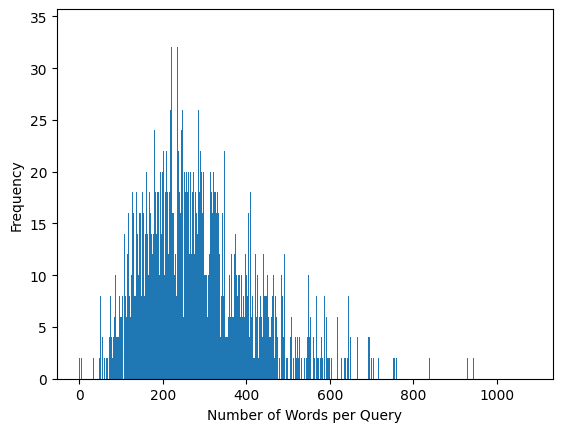

In [21]:
plt.hist(df['WordCount'], bins=range(1, max(df['WordCount'])+1), align='left')
plt.xlabel('Number of Words per Query')
plt.ylabel('Frequency')
plt.show()

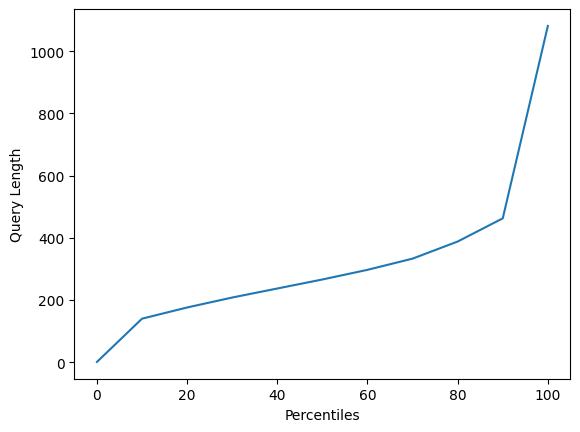

In [22]:
queries_percentiles = np.percentile(df['WordCount'], range(0, 101, 10))
plt.plot(range(0, 101, 10),queries_percentiles)
plt.xlabel('Percentiles')
plt.ylabel('Query Length')    
plt.show()

In [23]:
print("90th Percentile: ",np.percentile(df['WordCount'], 90))
print("95th Percentile: ",np.percentile(df['WordCount'], 95))
print("99th Percentile: ",np.percentile(df['WordCount'], 99))

90th Percentile:  462.5
95th Percentile:  547.0
99th Percentile:  682.0


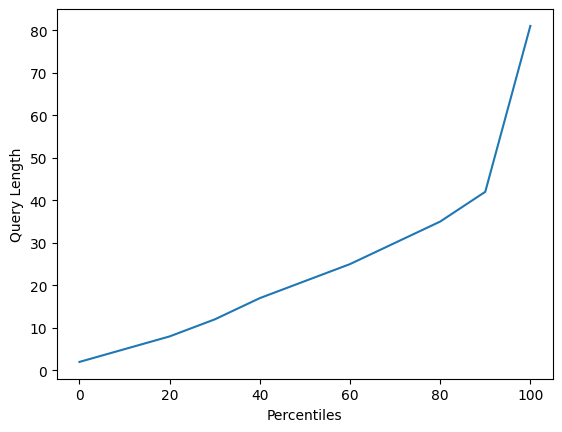

In [177]:
queries_percentiles = np.percentile(queries_df_train['WordCount'], range(0, 101, 10))
plt.plot(range(0, 101, 10),queries_percentiles)
plt.xlabel('Percentiles')
plt.ylabel('Query Length')    
plt.show()

In [27]:
# docs_df_train['WordCount'] = docs_df_train['Doc'].apply(lambda x: len(nltk.word_tokenize(x)))
wst=WhitespaceTokenizer()
df['WordCount_ws'] = df['desc'].apply(lambda x: len((wst.tokenize(x))))

/tmp/ipykernel_392797/2827877892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WordCount_ws'] = df['desc'].apply(lambda x: len((wst.tokenize(x))))


### Word Tokenizer

In [24]:
print("Average number of words per doc ", df["WordCount"].mean())
print("Min number of words per doc ", df["WordCount"].min())
print("Max number of words per doc ", df["WordCount"].max())
print("Median number of words per doc ", df["WordCount"].median())

Average number of words per doc  287.322663723326
Min number of words per doc  1
Max number of words per doc  1081
Median number of words per doc  266.0


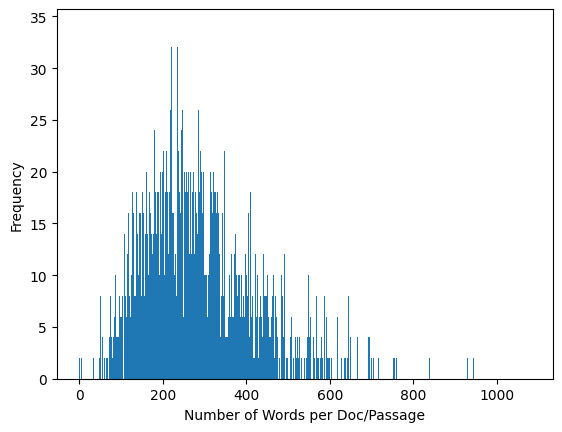

In [25]:
plt.hist(df['WordCount'], bins=range(1, max(df['WordCount'])+1), align='left')
plt.xlabel('Number of Words per Doc/Passage')
plt.ylabel('Frequency')
plt.show()

### WhiteSpace Tokenizer

In [28]:
print("Average number of words per doc ", df["WordCount_ws"].mean())
print("Min number of words per doc ", df["WordCount_ws"].min())
print("Max number of words per doc ", df["WordCount_ws"].max())
print("Median number of words per doc ", df["WordCount_ws"].median())

Average number of words per doc  249.55371596762325
Min number of words per doc  1
Max number of words per doc  974
Median number of words per doc  231.0


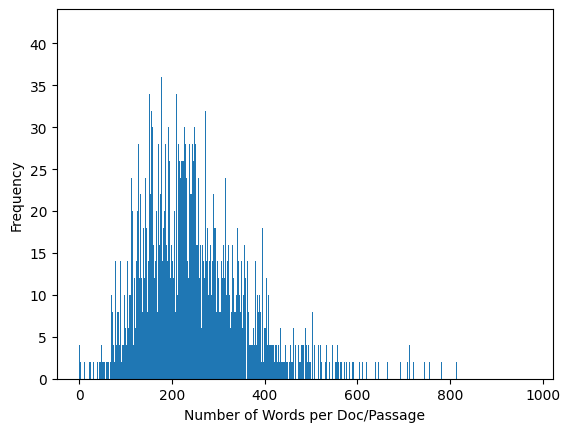

In [29]:
plt.hist(df['WordCount_ws'], bins=range(1, max(df['WordCount_ws'])+1), align='left')
plt.xlabel('Number of Words per Doc/Passage')
plt.ylabel('Frequency')
plt.show()

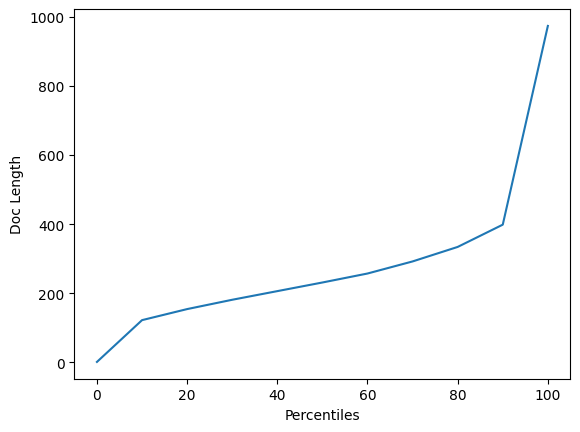

In [32]:
docs_percentiles = np.percentile(df['WordCount_ws'], range(0, 101, 10))
plt.plot(range(0, 101, 10),docs_percentiles)
plt.xlabel('Percentiles')
plt.ylabel('Doc Length')    
plt.show()

In [33]:
print("70th Percentile: ",np.percentile(df['WordCount_ws'], 70))
print("90th Percentile: ",np.percentile(df['WordCount_ws'], 90))
print("95th Percentile: ",np.percentile(df['WordCount_ws'], 95))
print("99th Percentile: ",np.percentile(df['WordCount_ws'], 99))

70th Percentile:  292.0
90th Percentile:  398.5
95th Percentile:  470.5
99th Percentile:  592.0
